In [26]:
import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
from trainAlgorithm import *
import matplotlib.pyplot as plt

# Base Test - General Basis Functions

In [27]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b)}
functions_op = {"exp-": lambda a: np.exp(-a), "exp": lambda a: np.exp(a),
               "ln": lambda a: np.log(a), "tanh": lambda a: np.tanh(a)}
custom_functions_dict = {"exp-": ["exp(-", ")"]}
weights = {"exp": 4, "exp-": 4, "ln" : 4, "tanh": 4}

In [28]:
def func(x):
    a=10
    b=-0.5
    c=-0.5
    d=2
    return a*np.exp(b*np.exp(c*x + d))

X = np.linspace(0, 20, 1000)
y = func(X)

x_range = [-5, 15]
n_points = 1000
dir_path = "Outputs/random_LS_optimization/base_test_general"
const_range = (-10, 10)
population = 4000
generations = 10
max_expression_size = 5
n_runs = 3
real_func_string = r"10e^{-0.5e^{-0.5x+2}}"
optimization_kind = "random_LS"

X, y, operators, functions = testAlgorithm(func, x_range, n_points, dir_path, population, generations,
                                          max_expression_size, normalize=True, const_range=const_range,
                                          ignore_warning=True, overwrite=True, n_runs=n_runs, 
                                          functions=functions_op, operators = operators_op, weights = weights,
                                          optimization_kind=optimization_kind, custom_functions_dict=custom_functions_dict)

-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - random_LS_optimization/base_test_general =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - random_LS_optimization/base_test_general =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - random_LS_optimization/base_test_general =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - random_LS_optimization/base_test_general =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - random_LS_optimization/base_test_general =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - random_LS_optimization/base_test_general =-=-=-=-=-=-=-


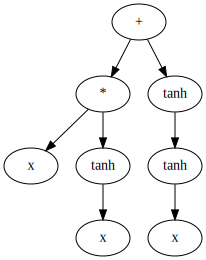

In [29]:
with open("Outputs/random_LS_optimization/base_test_general/trees/tree-40-10-2", "rb") as file:
    tree = pickle.load(file)
tree.visualize_tree()

# Base Test - Specific

In [30]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b)}
functions_op = {"exp-": lambda a: np.exp(-a), "exp": lambda a: np.exp(a)}
weights = {"exp": 4, "exp-": 4}

In [31]:
def func(x):
    a=10
    b=-0.5
    c=-0.5
    d=2
    return a*np.exp(b*np.exp(c*x + d))

X = np.linspace(0, 20, 1000)
y = func(X)

x_range = [-5, 15]
n_points = 1000
dir_path = "Outputs/random_LS_optimization/base_test_specific"
const_range = (-10, 10)
population = 4000
generations = 10
max_expression_size = 5
n_runs = 3
real_func_string = r"10e^{-0.5e^{-0.5x+2}}"
optimization_kind = "random_LS"

X, y, operators, functions = testAlgorithm(func, x_range, n_points, dir_path, population, generations,
                                          max_expression_size, normalize=True, const_range=const_range,
                                          ignore_warning=True, overwrite=False, n_runs=n_runs, 
                                          functions=functions_op, operators = operators_op, weights = weights,
                                          optimization_kind=optimization_kind, custom_functions_dict=custom_functions_dict)

-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - random_LS_optimization/base_test_specific =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - random_LS_optimization/base_test_specific =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - random_LS_optimization/base_test_specific =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - random_LS_optimization/base_test_specific =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - random_LS_optimization/base_test_specific =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - random_LS_optimization/base_test_specific =-=-=-=-=-=-=-


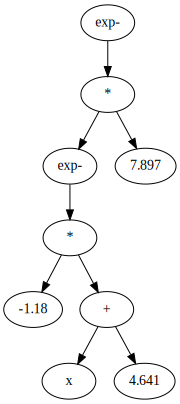

In [32]:
with open("Outputs/LS_optimization/base_test_specific/trees/tree-4000-10-2", "rb") as file:
    tree = pickle.load(file)
tree.visualize_tree()

# !!!!! O PROBLEMA FOI O CHUTE INICIAL

Além disso, uma mutação específica na constante (adicionar ou remover uma, com um valor específico), pode ser suficiente para fazer com que o método não venha mais a convergir, onde antes convergia. Ou seja, o problema do chute inicial também aparece nesse sentido, uma solução boa pode ser redirecionada no meio do processo evolutivo, caso a constante errada apareça. 

In [33]:
from scipy.optimize import curve_fit

def f_func(X, a, b, c):
    return np.exp(-a*np.exp(-b*X+c))

params_oguess, _ = curve_fit(f_func, X_plot, y_plot, [7.897, -1.18, 4.641])
params, _ = curve_fit(f_func, X_plot, y_plot, [1,1,1])

NameError: name 'X_plot' is not defined

In [ ]:
print(f"""
Parâmetros com o chute inicial igual aquele fornecido pela árvore [7.897, -1.18, 4.641]: {params_oguess}
Parâmetros com o chute inicial igual aquele a [1,1,1]: {params}
""")

In [ ]:
def func(x):
    a=10
    b=-0.5
    c=-0.5
    d=2
    return a*np.exp(b*np.exp(c*x + d))

X = np.linspace(-5, 15, 1000)
y = func(X)

def found_func(X):
    return np.exp(-7.897*np.exp(-1*(-1.18*(X+4.641))))

scaler = MinMaxScaler()
X_plot = scaler.fit_transform(np.c_[X]).reshape(-1)
y_plot = scaler.fit_transform(np.c_[y]).reshape(-1)

# plt.plot(X_plot, y_plot, label="real")
plt.plot(X, found_func(X), label="predicted")
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = np.linspace(-5, 15, 1000)
y = func(X)

scaler.fit_transform(np.c_[y])

def unorm_func(X, y):
    # x_norm = (X - X.min())/(X.max() - X.min())
    x_norm = (X.max() - X.min())*X + X.min()
    return (y.max() - y.min())*(np.exp(-x_norm * np.exp(-5.293 * x_norm))) + y.min()
    # return (np.exp(-x_norm * np.exp(-5.293 * x_norm)) - y.min())/(y.max() - y.min())

In [ ]:
import pandas as pd
data = pd.read_csv("Outputs/base_test_specific/data/data-5000.csv", sep=",")

In [ ]:
X = np.linspace(-5, 15, 1000)
y = func(X)

plt.plot(scaler.fit_transform(np.c_[X]), scaler.fit_transform(np.c_[y]))
# plt.plot(X, unorm_func(X, y))
# plt.plot(X, scaler.inverse_transform(np.c_[data.y]))
plt.plot(data.x, data.y)
plt.show()

# Base Test - General Basis Functions - nonNorm

In [34]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b)}
functions_op = {"exp-": lambda a: np.exp(-a), "exp": lambda a: np.exp(a),
               "ln": lambda a: np.log(a), "tanh": lambda a: np.tanh(a)}
weights = {"exp": 4, "exp-": 4, "ln" : 4, "tanh": 4}

In [36]:
def func(x):
    a=10
    b=-0.5
    c=-0.5
    d=2
    return a*np.exp(b*np.exp(c*x + d))

X = np.linspace(0, 20, 1000)
y = func(X)

x_range = [-5, 15]
n_points = 1000
dir_path = "Outputs/random_LS_optimization/base_test_general_nonNorm"
const_range = (-10, 10)
population = 4000
generations = 10
max_expression_size = 5
n_runs = 3
real_func_string = r"10e^{-0.5e^{-0.5x+2}}"
optimization_kind = "random_LS"

X, y, operators, functions = testAlgorithm(func, x_range, n_points, dir_path, population, generations,
                                          max_expression_size, normalize=False, const_range=const_range,
                                          ignore_warning=True, overwrite=False, n_runs=n_runs, 
                                          functions=functions_op, operators = operators_op, weights = weights,
                                          optimization_kind=optimization_kind, custom_functions_dict=custom_functions_dict)

-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - random_LS_optimization/base_test_general_nonNorm =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - random_LS_optimization/base_test_general_nonNorm =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - random_LS_optimization/base_test_general_nonNorm =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - random_LS_optimization/base_test_general_nonNorm =-=-=-=-=-=-=-
-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - random_LS_optimization/base_test_general_nonNorm =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - random_LS_optimization/base_t

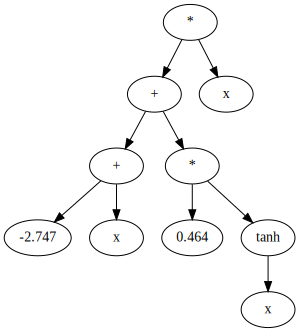

In [43]:
with open("Outputs/random_LS_optimization/base_test_general_nonNorm/trees/tree-4000-10-2", "rb") as file:
    tree = pickle.load(file)
tree.visualize_tree()

# Base Test - Specific - nonNorm

In [37]:
operators_op = {"+": lambda a,b: np.add(a,b), "*": lambda a,b: np.multiply(a,b)}
functions_op = {"exp-": lambda a: np.exp(-a), "exp": lambda a: np.exp(a)}
weights = {"exp": 4, "exp-": 4}

In [38]:
def func(x):
    a=10
    b=-0.5
    c=-0.5
    d=2
    return a*np.exp(b*np.exp(c*x + d))

X = np.linspace(0, 20, 1000)
y = func(X)

x_range = [-5, 15]
n_points = 1000
dir_path = "Outputs/random_LS_optimization/base_test_specific_nonNorm"
const_range = (-10, 10)
population = 4000
generations = 10
max_expression_size = 5
n_runs = 3
real_func_string = r"10e^{-0.5e^{-0.5x+2}}"
optimization_kind = "random_LS"

X, y, operators, functions = testAlgorithm(func, x_range, n_points, dir_path, population, generations,
                                          max_expression_size, normalize=False, const_range=const_range,
                                          ignore_warning=True, overwrite=False, n_runs=n_runs, 
                                          functions=functions_op, operators = operators_op, weights = weights,
                                          optimization_kind=optimization_kind, custom_functions_dict=custom_functions_dict)

-=-=-=-=-=-=-=-= Training for population 4000 and generation 10 - random_LS_optimization/base_test_specific_nonNorm =-=-=-=-=-=-=-=-
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
iniciou
-=-=-=-=-=-=-= Done training for population 4000 and generation 10 - random_LS_optimization/base_test_specific_nonNorm =-=-=-=-=-=-=-


OSError: Cannot save file into a non-existent directory: 'Outputs\random_LS_optimization\base_test_specific_nonNorm\data'

In [ ]:
with open("Outputs/random_LS_optimization/base_test_specific/trees/tree-4000-10-2", "rb") as file:
    tree = pickle.load(file)
tree.visualize_tree()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = np.linspace(-5, 15, 1000)
y = func(X)

scaler.fit_transform(np.c_[y])

def unorm_func(X, y):
    # x_norm = (X - X.min())/(X.max() - X.min())
    x_norm = (X.max() - X.min())*X + X.min()
    return (y.max() - y.min())*(np.exp(-x_norm * np.exp(-5.293 * x_norm))) + y.min()
    # return (np.exp(-x_norm * np.exp(-5.293 * x_norm)) - y.min())/(y.max() - y.min())

In [ ]:
import pandas as pd
data = pd.read_csv("Outputs/base_test_specific/data/data-5000.csv", sep=",")

## X = np.linspace(-5, 15, 1000)
y = func(X)

plt.plot(scaler.fit_transform(np.c_[X]), scaler.fit_transform(np.c_[y]))
# plt.plot(X, unorm_func(X, y))
# plt.plot(X, scaler.inverse_transform(np.c_[data.y]))
plt.plot(data.x, data.y)
plt.show()